<a href="https://colab.research.google.com/github/rovilay/Airbnb-superhost-classification/blob/develop/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problem

## Superhost Classification

Airbnb has a "Superhost" program for highly rated and reliable hosts. In this project, we will create a classification model to predict whether a host is a Superhost based on features like number of listings, response rate, number of reviews, etc.

### [Who is an Airbnb superhost?](https://www.airbnb.com/d/superhost-guest#:~:text=Being%20an%20Airbnb%20Superhost%20is,and%20often%20exceeding%2C%20guest%20expectations.)

Airbnb Superhosts are the top-rated, most experienced hosts on Airbnb, committed to providing you with outstanding hospitality.

### What makes a Superhost super?

Every 3 months, each host is evaluated on their hospitality. Superhosts meet all of the criteria—they’re highly rated, experienced, reliable, and responsive.

*The relevant criteria include:*

1. ***4.8+ overall rating:*** Every Superhost has a track record of highly rated stays, which means you can expect outstanding hospitality.
2. ***10+ stays:*** Superhosts are experienced, with a strong track record of hosting Airbnb guests.
3. **<1% cancellation rate:** Enjoy peace of mind as you plan—Superhosts rarely cancel.
4. ***90% response rate:*** Get a quick response when you reach out. Help and answers from a Superhost are just a message away.





## About the Dataset

This dataset offers comprehensive insights into Airbnb listings, covering details about hosts, locations, and reviews. It provides all the essential information one might require before planning an Airbnb stay, including property descriptions, summaries, and images. Additionally, it includes host-related data such as profile pictures, contact information, and response times. Ratings for cleanliness, accuracy, and other factors are also available. Notably, the dataset even includes information about transit options near each listing's location. Plan your next getaway with confidence, armed with all the data needed to ensure a delightful and informed stay.

[LEARN MORE](https://www.kaggle.com/datasets/thedevastator/airbnb-listings-analysis-host-location-and-revie/data)

Further Credit to[ Simit Rock](https://data.world/sumitrock) on the data

### Features

1. **listing_url:**	URL of the listing.(String)
2. **last_scraped:**	Date the listing was last scraped. (Date)
3. **name:**	Name of the listing. (String)
4. **summary:**	Summary of the listing. (String)
5. **space:**	Description of the space being offered. (String)
6. **description:**	Detailed description of the listing. (String)
7. **experiences_offered:**	Experiences offered by the host. (String)
8. **neighborhood_overview:**	Overview of the neighborhood. (String)
9. **notes:**	Notes about the listing. (String)
10. **transit:**	Transit options close by. (String)
11. **thumbnail_url:**	URL of the thumbnail picture. (String)
12. **medium_url:**	URL of the medium picture. (String)
13. **picture_url:**	URL of the picture. (String)
14. **xl_picture_url:**	URL of the extra large picture. (String)
15. **host_url:**	URL of the host. (String)
16. **host_name:**	Name of the host. (String)
17. **host_since:**	Date the host has been registered on Airbnb. (Date)
18. **host_location:**	Location of the host. (String)
19. **host_about:**	Description of the host. (String)
20. **host_response_time:**	Response time of the host to inquiries. (String)
21. **host_response_rate:**	The rate at which the host responds to inquiries. (Float)
22. **host_acceptance_rat:**e	The rate at which the host accepts invitations. (Float)
23. **host_is_superhost:**	Whether the host is a superhost or not. (Boolean)
24. **host_thumbnail_url:**	URL of the host's thumbnail picture. (String)
25. **host_picture_url:**	URL of the host's picture. (String)
26. **host_neighbourhood:**	The neighbourhood of the host. (String)
27. **host_listings_count:**	The number of listings the host has. (Integer)
28. **host_total_listings_count:**	The total number of listings the host has. (Integer)
29. **host_verifications:**	Verifications offered by the host. (String)
30. **host_has_profile_pic:**	Whether the host has a profile picture or not. (Boolean)
31. **street:**	Street address of the listing. (String)
32. **neighbourhood_cleansed:**	Cleansed neighbourhood of the listing. (String)
33. **neighbourhood_group_cleanse:**d	Cleansed neighbourhood group of the listing. (String)
34. **city:**	City of the listing. (String)
35. **state:**	State of the listing. (String)
36. **zipcode:**	Zipcode of the listing. (String)
37. **market:**	Market of the listing. (String)
38. **smart_location:**	Smart location of the listing. (String)
39. **country_code:**	Country code of the listing. (String)

## Import Libraries


In [1]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, r2_score, mean_squared_error, confusion_matrix

## Load Dataset

Vist [here](https://www.kaggle.com/discussions/general/74235) to learn how to download data from Kaggle to google colab

In [2]:
 ! pip install -q kaggle

In [3]:
# upload kaggle credentials
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [4]:
! mkdir ~/.kaggle

In [5]:
# copy kaggle.json to .kaggle
! cp kaggle.json ~/.kaggle/

In [6]:
# change permissions of the file
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
# check if everything works well
! kaggle datasets list

ref                                                                title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/apple-quality                                     Apple Quality                                      170KB  2024-01-11 14:31:07          10143        237  1.0              
saketk511/2019-2024-us-stock-market-data                           2019-2024 US Stock Market Data                     155KB  2024-02-04 16:27:18           1063         29  1.0              
shiivvvaam/most-watched-movies-and-tv-shows                        Most Watched Movies and TV Shows                     1MB  2024-02-04 19:19:18           1272         39  1.0              
rifkaregmi/usa-mental-health-dataset              

In [8]:
# download dataset
! kaggle datasets download -d thedevastator/airbnb-listings-analysis-host-location-and-revie

  0% 0.00/3.58M [00:00<?, ?B/s]
100% 3.58M/3.58M [00:00<00:00, 178MB/s]


In [9]:
! mkdir abnb_data

In [10]:
# unzip train data there,
! unzip airbnb-listings-analysis-host-location-and-revie.zip -d abnb_data

Archive:  airbnb-listings-analysis-host-location-and-revie.zip
  inflating: abnb_data/listings.csv  


In [11]:
# Load the dataset
data_file = 'abnb_data/listings.csv'
data = pd.read_csv(data_file)

# 2. Exploratory Data Analysis (EDA) — Inspect, Visualize and Clean the Data


## Data Cleaning

The data cleaning procedures include:

* Deleting redundant columns
* Dropping duplicates
* Cleaning individual columns
* Remove the NaN values from the dataset
* Some Transformations

In [12]:
df = data.copy()

**Print shape of dataset**

In [13]:
df.shape

(3818, 93)

**Print datatypes of dataset**


In [14]:
df.dtypes

index                                 int64
id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
                                     ...   
cancellation_policy                  object
require_guest_profile_picture        object
require_guest_phone_verification     object
calculated_host_listings_count        int64
reviews_per_month                   float64
Length: 93, dtype: object

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 93 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   index                             3818 non-null   int64  
 1   id                                3818 non-null   int64  
 2   listing_url                       3818 non-null   object 
 3   scrape_id                         3818 non-null   int64  
 4   last_scraped                      3818 non-null   object 
 5   name                              3818 non-null   object 
 6   summary                           3641 non-null   object 
 7   space                             3249 non-null   object 
 8   description                       3818 non-null   object 
 9   experiences_offered               3818 non-null   object 
 10  neighborhood_overview             2786 non-null   object 
 11  notes                             2212 non-null   object 
 12  transi

**Drop duplicates (if any)**

In [16]:
df[df.duplicated()].sum()

index                               0.0
id                                  0.0
listing_url                         0.0
scrape_id                           0.0
last_scraped                        0.0
                                   ... 
cancellation_policy                 0.0
require_guest_profile_picture       0.0
require_guest_phone_verification    0.0
calculated_host_listings_count      0.0
reviews_per_month                   0.0
Length: 93, dtype: float64

In [17]:
df.drop_duplicates(inplace=True)

**Drop unneccessary features**

These are features that do not provide relevant information to the problem.

In [18]:
dropped_features = ['description', 'jurisdiction_names', 'security_deposit', 'reviews_per_month',
 'state', 'cleaning_fee', 'medium_url', 'street', 'name', 'experiences_offered',
 'host_since', 'market', 'city', 'weekly_price', 'transit', 'notes', 'country_code',
 'id', 'host_picture_url', 'license', 'index', 'require_guest_phone_verification',
 'xl_picture_url', 'scrape_id', 'host_about', 'country', 'last_scraped',
 'thumbnail_url', 'is_location_exact', 'host_thumbnail_url', 'monthly_price',
 'host_id', 'space', 'first_review', 'calendar_updated', 'cancellation_policy',
 'last_review', 'require_guest_profile_picture', 'picture_url', 'calendar_last_scraped',
 'host_url', 'requires_license', 'smart_location', 'host_name',
 'neighborhood_overview', 'zipcode', 'host_location','summary', 'listing_url', 'longitude', 'latitude'
]

In [19]:
df.drop(dropped_features, axis=1, inplace=True)

**Check null values**

In [20]:
# Display columns with null values and their respective counts
null_columns = df.columns[df.isnull().any()]
null_counts = df[null_columns].isnull().sum()

# Create a DataFrame to display the results
null_info = pd.DataFrame({
    'Count': null_counts
})

null_info

,Count
host_response_time,523
host_response_rate,523
host_acceptance_rate,773
host_is_superhost,2
host_neighbourhood,300
host_listings_count,2
host_total_listings_count,2
host_has_profile_pic,2
host_identity_verified,2
neighbourhood,416


**Drop columns with more than 50% Null**

In [21]:
threshold = len(df) * 0.5

# Drop columns with more than 50% NaN values
df.dropna(axis=1, thresh=threshold, inplace=True)

**Data so far ...**

In [22]:
df.head(5)

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count
0,within a few hours,96%,100%,f,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,...,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,2
1,within an hour,98%,100%,t,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,...,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,6
2,within a few hours,67%,100%,f,Queen Anne,2.0,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",t,t,...,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,2
3,NaN,NaN,NaN,f,Queen Anne,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1
4,within an hour,100%,NaN,f,Queen Anne,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,...,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,f,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3818 entries, 0 to 3817
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_response_time              3295 non-null   object 
 1   host_response_rate              3295 non-null   object 
 2   host_acceptance_rate            3045 non-null   object 
 3   host_is_superhost               3816 non-null   object 
 4   host_neighbourhood              3518 non-null   object 
 5   host_listings_count             3816 non-null   float64
 6   host_total_listings_count       3816 non-null   float64
 7   host_verifications              3818 non-null   object 
 8   host_has_profile_pic            3816 non-null   object 
 9   host_identity_verified          3816 non-null   object 
 10  neighbourhood                   3402 non-null   object 
 11  neighbourhood_cleansed          3818 non-null   object 
 12  neighbourhood_group_cleansed    38

**Group features based on superhost classification criteria**

1. ***4.8+ overall rating***
2. ***10+ stays***
3. **<1% cancellation rate**
4. ***90% response rate***

### Potentially important features

* number_of_reviews: This is the number of reviews a host has received all through their lifetime at airbnb.
* review_scores_rating: This is the score rating a host has received all through their lifetime at airbnb.
* availability_365: This is availability of the host for the next 365 days.
* host_response_rate: The is the response rate of the host.

In [24]:
dependent_feat = ['host_is_superhost']

selected_feats = ['number_of_reviews', 'review_scores_rating', 'availability_365', 'host_response_rate']

#### EDA: Data Transformations, Analysis and Visualization




**Show columns with object datatypes**

Some of these columns require some transformation to extract necessary data.

We will examine the columns with object dtypes, and see if we can extract sensible numeric data from them.

In [25]:
object_dtypes_df = df.select_dtypes(include=['object'])

object_dtypes_df.head()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,bed_type,amenities,price,extra_people,has_availability,instant_bookable
0,within a few hours,96%,100%,f,Queen Anne,"['email', 'phone', 'reviews', 'kba']",t,t,Queen Anne,West Queen Anne,Queen Anne,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$85.00,$5.00,t,f
1,within an hour,98%,100%,t,Queen Anne,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,Queen Anne,West Queen Anne,Queen Anne,Apartment,Entire home/apt,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",$150.00,$0.00,t,f
2,within a few hours,67%,100%,f,Queen Anne,"['email', 'phone', 'google', 'reviews', 'jumio']",t,t,Queen Anne,West Queen Anne,Queen Anne,House,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$975.00,$25.00,t,f
3,NaN,NaN,NaN,f,Queen Anne,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,Queen Anne,West Queen Anne,Queen Anne,Apartment,Entire home/apt,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",$100.00,$0.00,t,f
4,within an hour,100%,NaN,f,Queen Anne,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,Queen Anne,West Queen Anne,Queen Anne,House,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",$450.00,$15.00,t,f


**Transform currency columns to numeric values**



In [26]:
currency_columns = ['price', 'extra_people']

for col in currency_columns:
    df[col] = df[col].str[1:].str.replace(",","").astype("float")

In [27]:
df[currency_columns].head()

,price,extra_people
0,85.0,5.0
1,150.0,0.0
2,975.0,25.0
3,100.0,0.0
4,450.0,15.0


**Transform boolean columns to numeric values**

In [28]:
bool_columns = ['host_is_superhost', 'has_availability', 'host_identity_verified',
                'host_has_profile_pic', 'instant_bookable']
df[bool_columns].head()

,host_is_superhost,has_availability,host_identity_verified,host_has_profile_pic,instant_bookable
0,f,t,t,t,f
1,t,t,t,t,f
2,f,t,t,t,f
3,f,t,t,t,f
4,f,t,t,t,f


In [29]:
# convert bool columns to int dtype
for col in bool_columns:
  df[col] = df[col].apply(lambda x: 1 if x == 't' else 0)

df[bool_columns].head()

,host_is_superhost,has_availability,host_identity_verified,host_has_profile_pic,instant_bookable
0,0,1,1,1,0
1,1,1,1,1,0
2,0,1,1,1,0
3,0,1,1,1,0
4,0,1,1,1,0


**Extract numeric value from percentage columns**

In [30]:
percent_columns = ['host_response_rate', 'host_acceptance_rate']

for col in percent_columns:
  df[col] = df[col].str[:-1].astype("float") / 100

**Fill NaN**

In [31]:
columns_with_nan = df.columns[df.isna().any()].tolist()
columns_with_nan

['host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'neighbourhood',
 'property_type',
 'bathrooms',
 'bedrooms',
 'beds',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value']

In [32]:
# for host_is_superhost
df['host_is_superhost'].fillna(0, inplace=True)

# for host_listings_count fill 0
df['host_listings_count'].fillna(0, inplace=True)

# for host_total_listings_count fill 0
df['host_total_listings_count'].fillna(0, inplace=True)

# for property related feats fill with property average
property_feats_with_nan = ['bathrooms', 'beds', 'bedrooms']

for col in property_feats_with_nan:
  if col not in columns_with_nan:
    print(f'{col} do not exist in data')
    continue

  avg = df.groupby('property_type')[col].mean()
  # Fill NaN values in host_response_rate based on the average of each property group
  df[col] = df.apply(
      lambda row: avg[row['property_type']] if pd.isna(row[col]) else row[col],
      axis=1
  )

other_feats_with_nan = ['review_scores_accuracy', 'review_scores_cleanliness',
                        'review_scores_communication', 'review_scores_location',
                        'host_acceptance_rate', 'review_scores_value',
                        'review_scores_checkin', 'review_scores_rating', 'host_response_rate']
for col in other_feats_with_nan:
  if col not in columns_with_nan:
    print(f'{col} do not exist in data')
    continue

  # Calculate the average response rate for each host_is_superhost group
  avg = df.groupby('host_is_superhost')[col].mean()

  # Fill NaN values in host_response_rate based on the average of each group
  df[col] = df.apply(
      lambda row: avg[row['host_is_superhost']] if pd.isna(row[col]) else row[col],
      axis=1
  )

df[columns_with_nan].isna().sum()

host_response_time             523
host_response_rate               0
host_acceptance_rate             0
host_neighbourhood             300
host_listings_count              0
host_total_listings_count        0
neighbourhood                  416
property_type                    1
bathrooms                        0
bedrooms                         0
beds                             0
review_scores_rating             0
review_scores_accuracy           0
review_scores_cleanliness        0
review_scores_checkin            0
review_scores_communication      0
review_scores_location           0
review_scores_value              0
dtype: int64

**Superhost distribution**

Total number of Superhosts:  778


Int64Index([0, 1], dtype='int64')


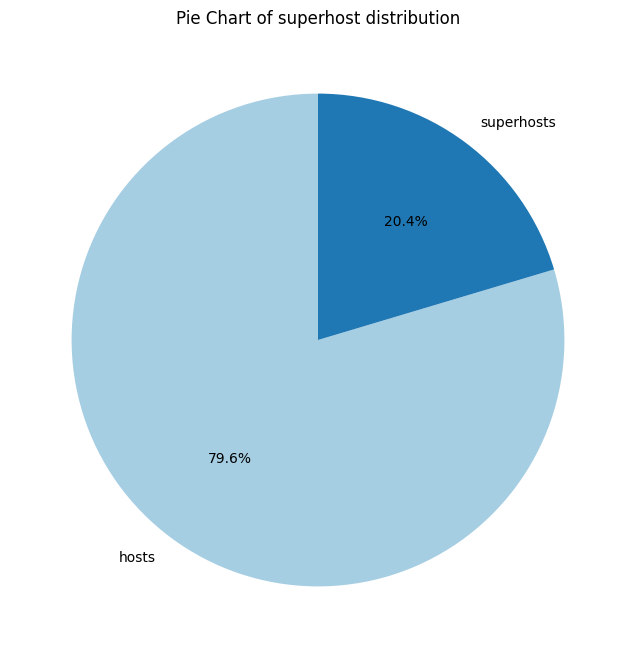

In [33]:
column_name = 'host_is_superhost'

superhost_count = df[column_name].sum()

print("Total number of Superhosts: ", superhost_count)
print('\n')

# Count the occurrences of each unique value in the chosen column
value_counts = df[column_name].value_counts()

print(value_counts.index)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=['hosts', 'superhosts'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title(f'Pie Chart of superhost distribution')
plt.show()

**Number of reviews**

<ipython-input-34-11b67d228ab7>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='host_is_superhost', y='number_of_reviews', data=average_reviews_by_superhost, palette='viridis')


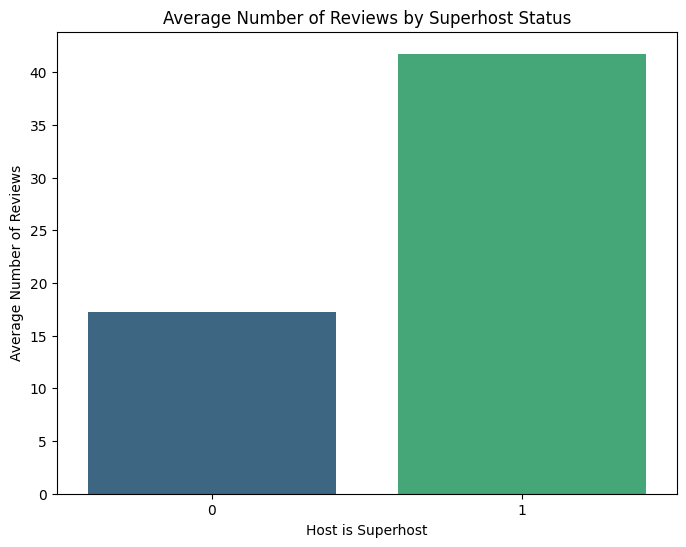

In [34]:
data = {'host_is_superhost': df['host_is_superhost'],
        'number_of_reviews': df['number_of_reviews']}

temp_df = pd.DataFrame(data)

# Convert 'host_is_superhost' to a categorical column for better grouping
temp_df['host_is_superhost'] = pd.Categorical(temp_df['host_is_superhost'], categories=[0, 1], ordered=True)

# Calculate the average number of reviews and group by 'host_is_superhost'
average_reviews_by_superhost = temp_df.groupby('host_is_superhost')['number_of_reviews'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='host_is_superhost', y='number_of_reviews', data=average_reviews_by_superhost, palette='viridis')
plt.title('Average Number of Reviews by Superhost Status')
plt.xlabel('Host is Superhost')
plt.ylabel('Average Number of Reviews')
plt.show()

The graph shows that the average number of reviews of superhosts far exceeds that of non-superhosts. Indicating a potential correlation.

**Host response time vs Host response rate**

Group average host_response_rate by host_response_time

<ipython-input-35-4b89f448a936>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=res.index, y='avg_host_response_rate', data=res, palette='viridis')


['within a few hours' 'within an hour' nan 'within a day'
 'a few days or more']


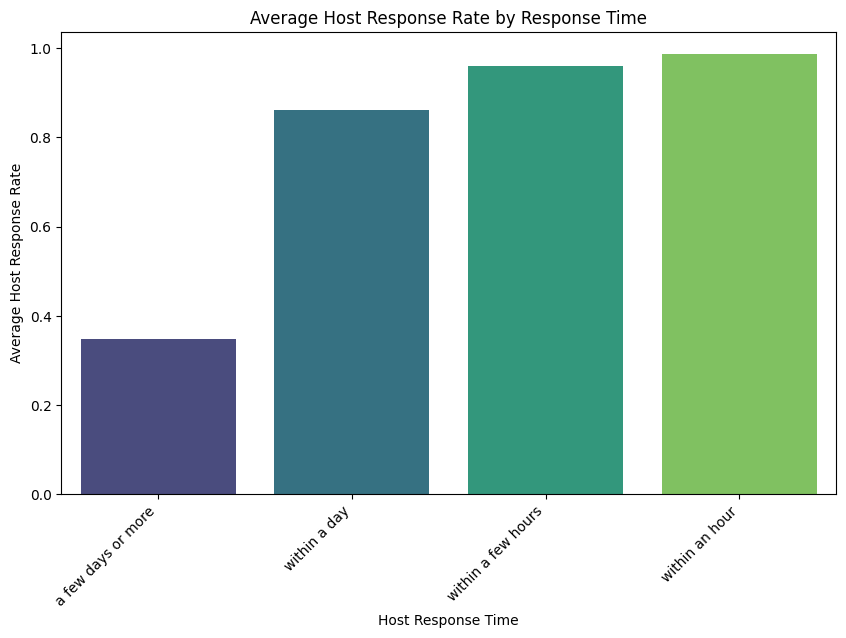

In [35]:
print(df['host_response_time'].unique())
res = df.groupby('host_response_time').agg(
    avg_host_response_rate=('host_response_rate', 'mean')
)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=res.index, y='avg_host_response_rate', data=res, palette='viridis')
plt.title('Average Host Response Rate by Response Time')
plt.xlabel('Host Response Time')
plt.ylabel('Average Host Response Rate')
plt.xticks(rotation=45, ha='right')
plt.show()

The Host Response time graph shows correlation with the host response rate. The faster the response time the higher the response rate.

**Transformation: Convert host_response_time to numeric value**

Map `host_response_time` to numeric values, creat a new column; `host_response_time_numeric` and drop the `host_response_time` column

In [36]:
# Define a mapping dictionary
response_time_mapping = {
    'within an hour': 4,
    'within a few hours': 3,
    'within a day': 2,
    'a few days or more': 1
}

# Use the map function to convert categorical values to numerical values
df['host_response_time_numeric'] = df['host_response_time'].map(response_time_mapping).fillna(0).astype(int)

# drop the host_response_time
df.drop(['host_response_time'], axis=1, inplace=True)

**Count number of superhosts by neighbourhood group**

In [37]:
# Neighbor hood
superhost_counts = df.groupby('neighbourhood_group_cleansed')['host_is_superhost'].sum().sort_values(ascending=False)

# Display the resulting Series with counts
print(superhost_counts)

neighbourhood_group_cleansed
Other neighborhoods    165
Downtown               105
Central Area           100
Capitol Hill            85
Ballard                 61
Queen Anne              61
West Seattle            44
Rainier Valley          38
Northgate               21
Delridge                19
Beacon Hill             18
Cascade                 16
Magnolia                14
Lake City               12
Seward Park             10
University District      7
Interbay                 2
Name: host_is_superhost, dtype: int64


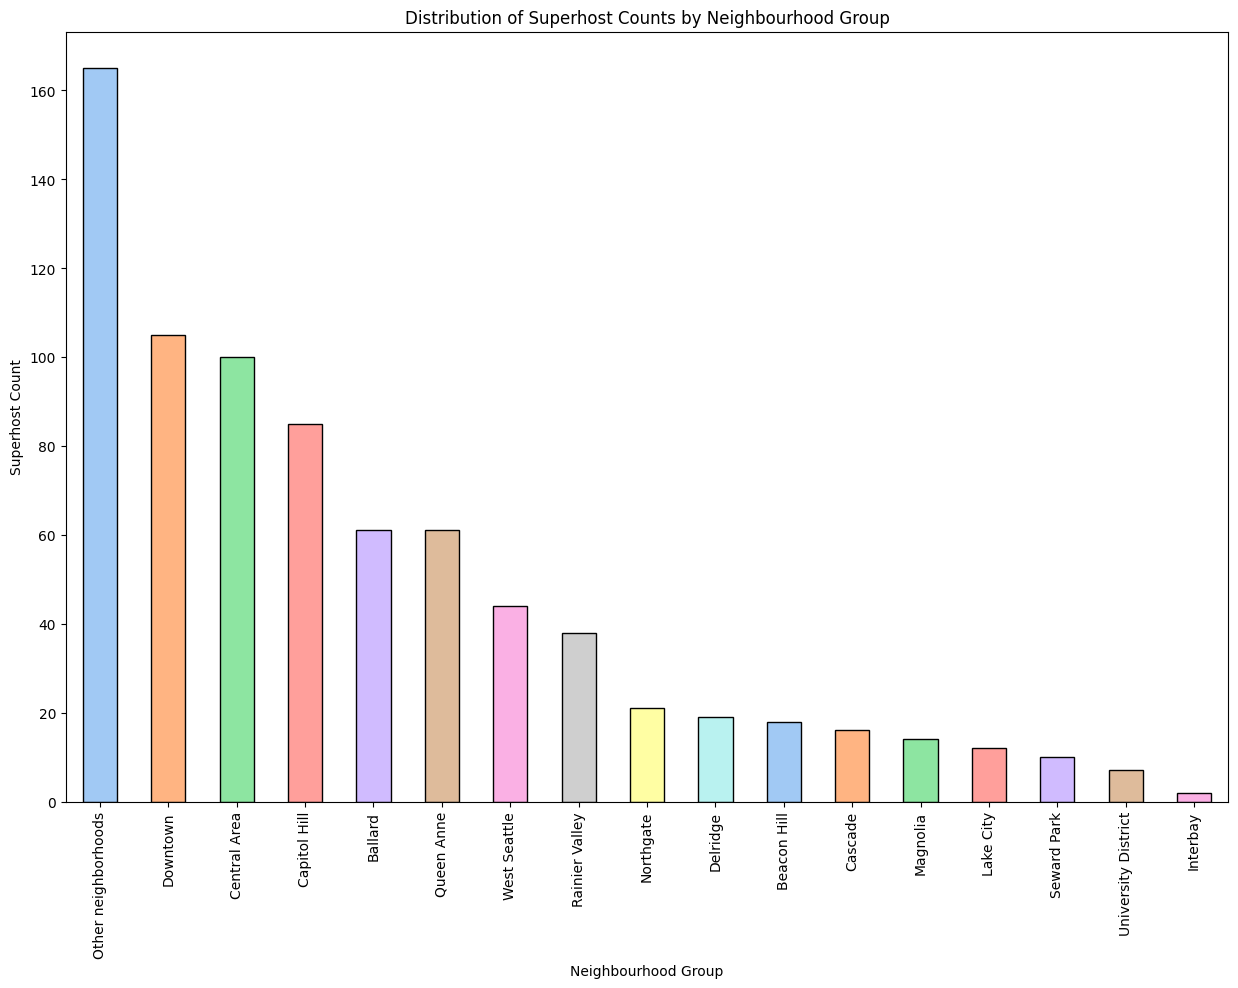

In [38]:
colors = sns.color_palette("pastel", len(superhost_counts))

# Plot histogram with different colors
plt.figure(figsize=(15, 10))
superhost_counts.plot(kind='bar', color=colors, edgecolor='black')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Superhost Count')
plt.title('Distribution of Superhost Counts by Neighbourhood Group')
plt.show()

**Check the distribution of superhost in the "Other neighborhoods" group**

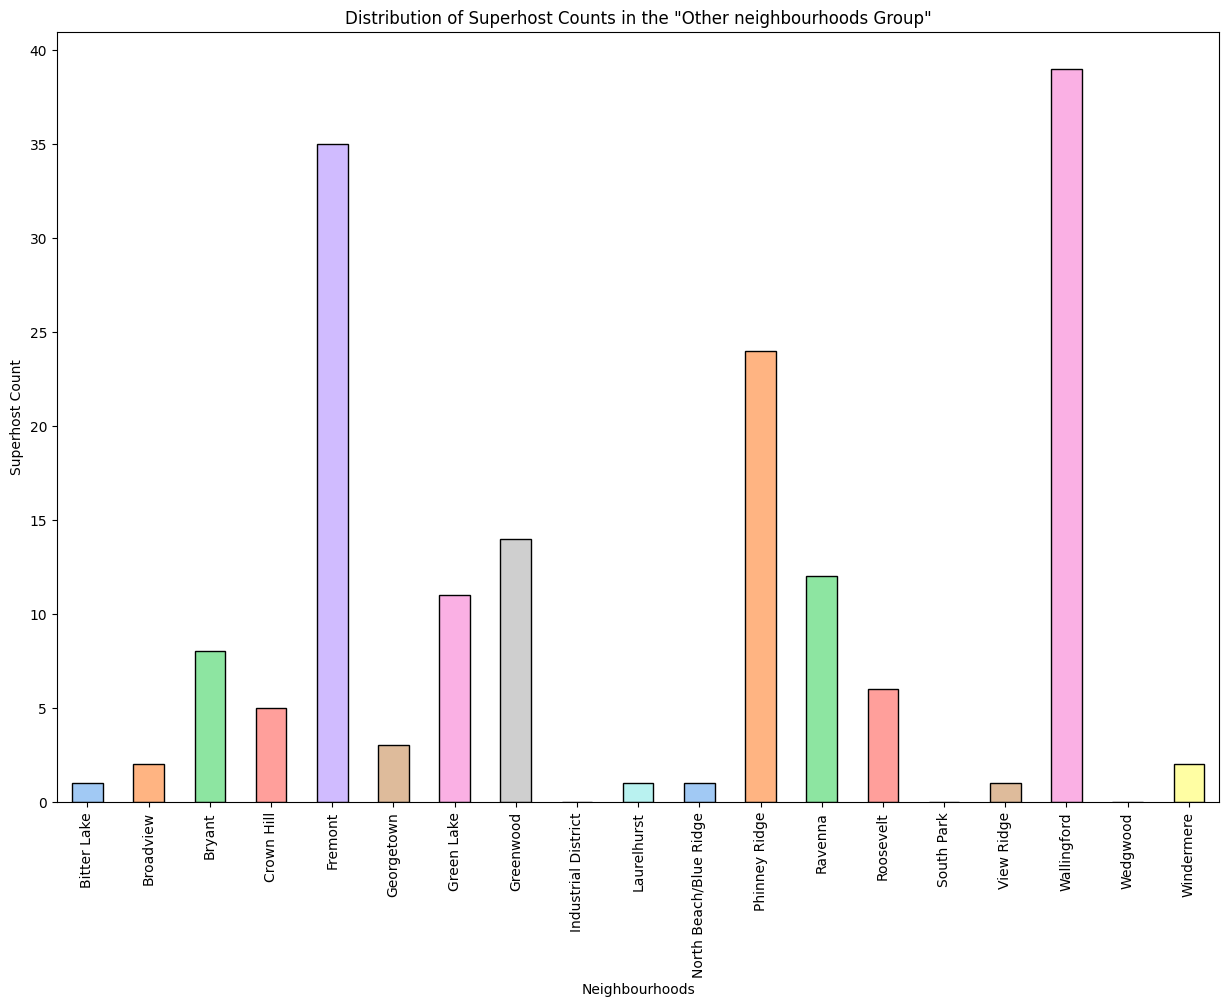

In [39]:
other_neigh_counts = df[df.neighbourhood_group_cleansed=="Other neighborhoods"].groupby(
    ["neighbourhood_cleansed"]
)['host_is_superhost'].sum()

colors = sns.color_palette("pastel", len(other_neigh_counts))
plt.figure(figsize=(15, 10))
other_neigh_counts.plot(kind='bar', color=colors, edgecolor='black')
plt.xlabel('Neighbourhoods')
plt.ylabel('Superhost Count')
plt.title('Distribution of Superhost Counts in the "Other neighbourhoods Group"')
plt.show()

**Count number of superhosts by neighbourhood**

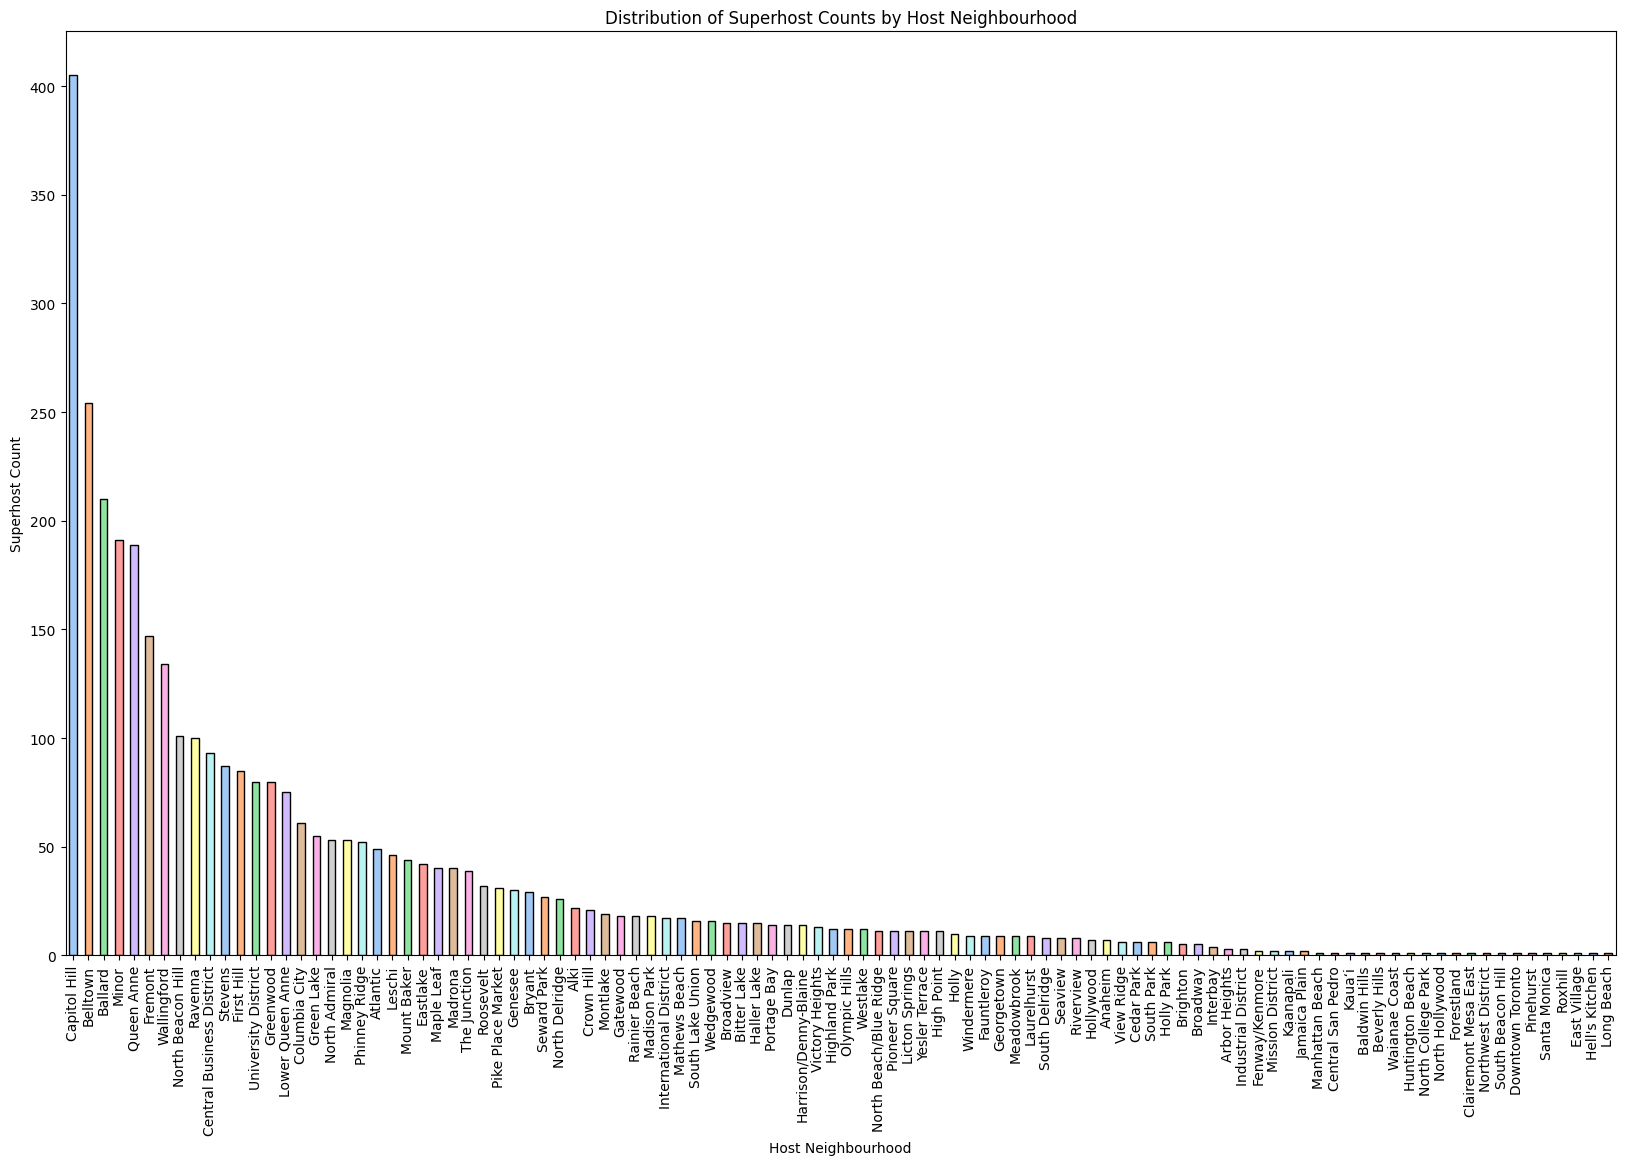

In [40]:
superhost_counts = df.groupby('host_neighbourhood')['host_is_superhost'].count().sort_values(ascending=False)

# Set a custom color palette for each neighborhood
colors = sns.color_palette("pastel", len(superhost_counts))

# Plot histogram with different colors
plt.figure(figsize=(20, 12))
superhost_counts.plot(kind='bar', color=colors, edgecolor='black')
plt.xlabel('Host Neighbourhood')
plt.ylabel('Superhost Count')
plt.title('Distribution of Superhost Counts by Host Neighbourhood')
plt.show()

**Count number of superhosts by Property Type**

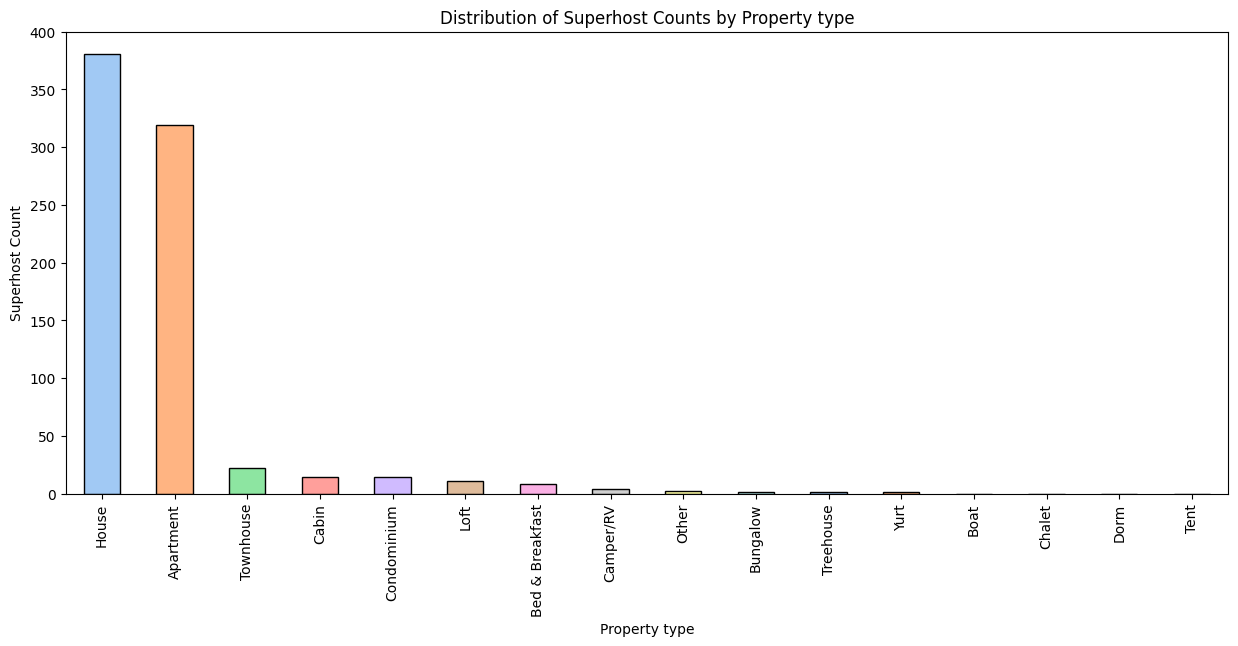

In [41]:
superhost_counts = df.groupby('property_type')['host_is_superhost'].sum().sort_values(ascending=False)

colors = sns.color_palette("pastel", len(superhost_counts))
plt.figure(figsize=(15, 6))
superhost_counts.plot(kind='bar', color=colors, edgecolor='black')
plt.xlabel('Property type')
plt.ylabel('Superhost Count')
plt.title('Distribution of Superhost Counts by Property type')
plt.show()

**Distribution of hosts by Property Type**

<Figure size 1500x600 with 0 Axes>

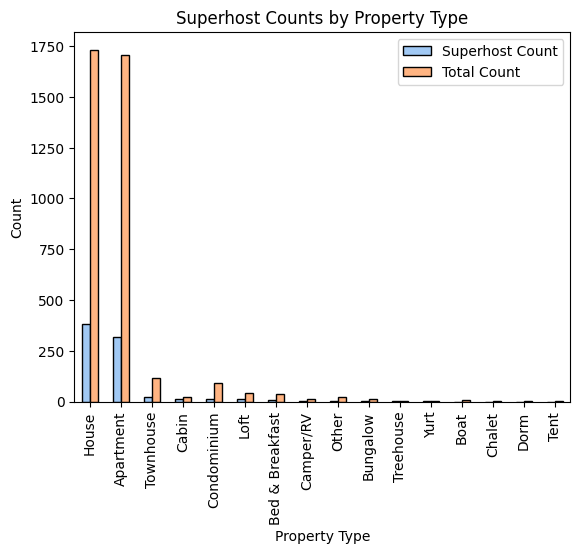

In [42]:
total_counts = df.groupby('property_type')['host_is_superhost'].count()

result_df = pd.DataFrame({'Superhost Count': superhost_counts, 'Total Count': total_counts})
result_df = result_df.sort_values(by='Superhost Count', ascending=False)

colors = sns.color_palette("pastel", len(result_df))
plt.figure(figsize=(15, 6))
result_df.plot(kind='bar', color=colors, edgecolor='black')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.title('Superhost Counts by Property Type')
plt.show()

**Extract data from Property Type**

Since house and apartment are the most with superhost, let's create columns for them and deprecate property_type columns.

In [43]:
df['property_is_house'] = (df['property_type'] == 'House').astype(int)
df['property_is_apartment'] = (df['property_type'] == 'Apartment').astype(int)

df[['host_is_superhost', 'property_is_house', 'property_is_apartment']].head()

,host_is_superhost,property_is_house,property_is_apartment
0,0,0,1
1,1,0,1
2,0,1,0
3,0,0,1
4,0,1,0


**Drop columns**

Drop columns that have been analysed or extracted.

Drop columns that have no useful information.

In [44]:
drop_columns = ['property_type', 'neighbourhood_cleansed',
                'neighbourhood', 'room_type', 'bed_type', 'host_response_time',
                'neighbourhood_group_cleansed', 'host_neighbourhood', 'amenities',
                'host_verifications', 'availability_30', 'availability_60', 'availability_90']

df.drop(drop_columns, axis=1, inplace=True, errors='ignore')

object_columns = df.select_dtypes(include=['object'])

**Examine Continous Variables**

In [45]:
df.describe()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,host_response_time_numeric,property_is_house,property_is_apartment
count,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,...,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000
mean,0.947894,0.999656,0.203772,7.154007,7.154007,0.997643,0.784966,3.349398,1.259475,1.307374,...,9.541939,9.778826,9.802379,9.602644,9.439086,0.154793,2.946307,2.855946,0.453903,0.447355
std,0.110335,0.016183,0.402854,28.621117,28.621117,0.048501,0.410900,1.977599,0.589220,0.882795,...,0.727446,0.542359,0.518044,0.572913,0.684117,0.361755,5.893029,1.360852,0.497936,0.497286
min,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,3.000000,2.000000,2.000000,4.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.939004,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,9.000000,9.731424,9.758278,9.000000,9.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,9.359602,0.000000,1.000000,3.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,3.000000,3.000000,1.000000,1.000000,4.000000,1.000000,2.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,0.000000,2.000000,4.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,502.000000,502.000000,1.000000,1.000000,16.000000,8.000000,7.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,37.000000,4.000000,1.000000,1.000000


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3818 entries, 0 to 3817
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_response_rate              3818 non-null   float64
 1   host_acceptance_rate            3818 non-null   float64
 2   host_is_superhost               3818 non-null   int64  
 3   host_listings_count             3818 non-null   float64
 4   host_total_listings_count       3818 non-null   float64
 5   host_has_profile_pic            3818 non-null   int64  
 6   host_identity_verified          3818 non-null   int64  
 7   accommodates                    3818 non-null   int64  
 8   bathrooms                       3818 non-null   float64
 9   bedrooms                        3818 non-null   float64
 10  beds                            3818 non-null   float64
 11  price                           3818 non-null   float64
 12  guests_included                 38

# 3. Analysis (model building and training)

We will try two classification models, namely:

1. A Logistic Regression Model
2. A RandomForest Classification Model

**Logistic Regression Model**

In [47]:
# Select features and target
X = df[['number_of_reviews', 'review_scores_rating', 'availability_365', 'host_response_rate']]
y = df[dependent_feat]  # assuming 'is_superhost' is your binary target variable

X['review_scores_rating'].fillna(0, inplace=True)
X['host_response_rate'].fillna(0, inplace=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

coefficients = model.coef_

print("Coefficients: ", coefficients)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# calculate confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("R2 score: ", r2_score(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)

print("MSE score: ", mse)

Coefficients:  [[ 1.75875606e-02  2.73306142e-01 -1.40324886e-04  3.12377097e+00]]
Accuracy: 0.7840314136125655
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.98      0.87       584
           1       0.71      0.14      0.23       180

    accuracy                           0.78       764
   macro avg       0.75      0.56      0.55       764
weighted avg       0.77      0.78      0.72       764

R2 score:  -0.1992009132420094
MSE score:  0.21596858638743455


<ipython-input-47-f010cbbe9eba>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['review_scores_rating'].fillna(0, inplace=True)
<ipython-input-47-f010cbbe9eba>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['host_response_rate'].fillna(0, inplace=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**RandomForest Classifiers Model (1st iteration)**




In [48]:
X = df.copy().drop(dependent_feat, axis=1)
y = df[dependent_feat]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)

# Train the model on the training set
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("R2 score: ", r2_score(y_test, y_pred))

mse = mean_squared_error(y_test, y_pred)
print("MSE score: ", mse)

<ipython-input-48-9d79960d8c95>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       584
           1       0.84      0.59      0.69       180

    accuracy                           0.88       764
   macro avg       0.86      0.78      0.81       764
weighted avg       0.87      0.88      0.87       764

R2 score:  0.3168188736681886
MSE score:  0.12303664921465969


**Select top 10 features**

Select top 10 features based on the model's `feature_importances_` attributes.

Top 10 important features:  Index(['number_of_reviews', 'review_scores_rating', 'availability_365',
       'price', 'review_scores_checkin', 'extra_people',
       'host_total_listings_count', 'review_scores_value',
       'review_scores_cleanliness', 'host_listings_count'],
      dtype='object')


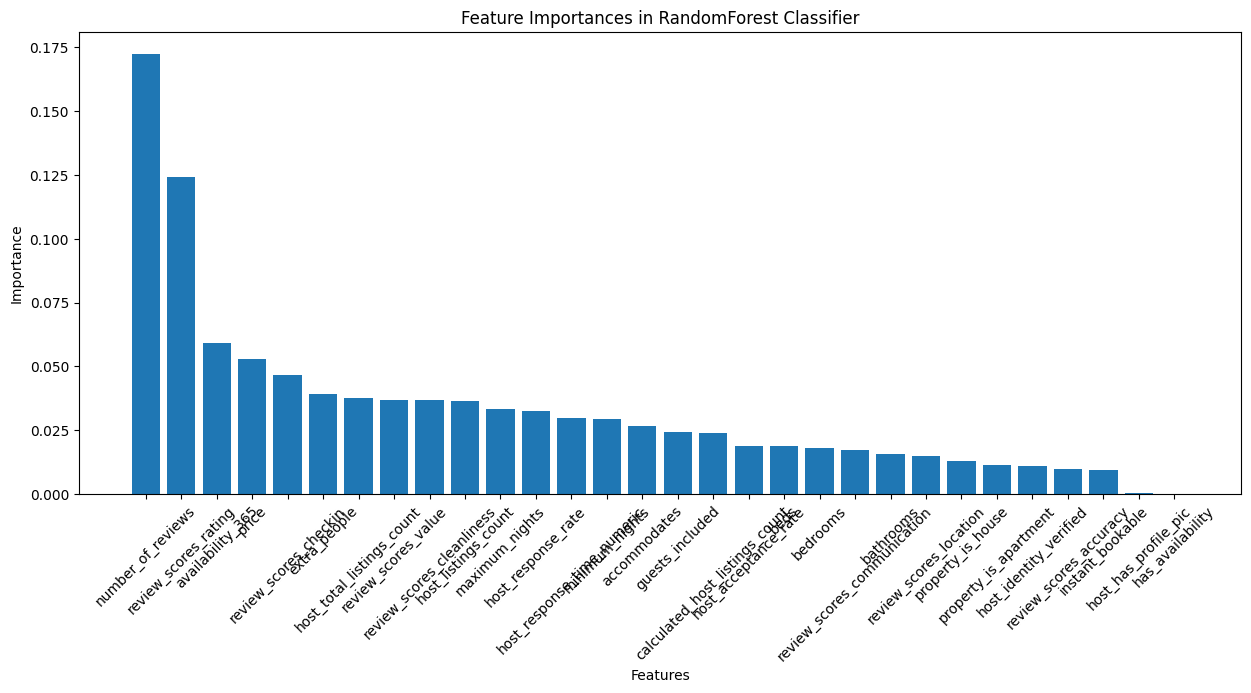

In [49]:
# feature importance
feature_importances = rf_classifier.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

# Select top N features
N = 10
top_n_features = X_train.columns[sorted_indices][:N]

threshold = 0.025
selected_features = X_train.columns[sorted_indices][feature_importances[sorted_indices] > threshold][:N]
print("Top 10 important features: ", selected_features)

# Plot the feature importances
plt.figure(figsize=(15, 6))
plt.bar(range(X_train.shape[1]), feature_importances[sorted_indices])
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=45)
plt.title('Feature Importances in RandomForest Classifier')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

**RandomTree Classifier Model (2nd iteration)**

Observe the selected (top 10) features from the 1st iteration, drop features that are less likely to contribute to the dependent feature such as `latitude`, `longitude`, or features already captured by other features such as `availability_90`

In [50]:
# Train the RandomForest classifier with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
# drop columns
X_train_selected.drop(['longitude', 'latitude', 'availability_90'], axis=1, inplace=True, errors='ignore')
X_test_selected.drop(['longitude', 'latitude', 'availability_90'], axis=1, inplace=True, errors='ignore')

rf_classifier_selected_features = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_selected_features.fit(X_train_selected, y_train)

y_pred = rf_classifier_selected_features.predict(X_test_selected)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("R2 score: ", r2_score(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
print("MSE score: ", mse)

<ipython-input-50-f82556c1794d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_selected.drop(['longitude', 'latitude', 'availability_90'], axis=1, inplace=True, errors='ignore')
<ipython-input-50-f82556c1794d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_selected.drop(['longitude', 'latitude', 'availability_90'], axis=1, inplace=True, errors='ignore')
<ipython-input-50-f82556c1794d>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier_selected_features.fit(X_train_selected, y_tra

Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       584
           1       0.74      0.58      0.65       180

    accuracy                           0.85       764
   macro avg       0.81      0.76      0.78       764
weighted avg       0.84      0.85      0.85       764

R2 score:  0.17872907153729056
MSE score:  0.14790575916230367


In [51]:
feature_importances = rf_classifier_selected_features.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
top_n_features = X_train_selected.columns[sorted_indices][:N]
print("Top features determining the superhost status: ", top_n_features)

Top features determining the superhost status:  Index(['number_of_reviews', 'review_scores_rating', 'price',
       'availability_365', 'extra_people', 'host_listings_count',
       'host_total_listings_count', 'review_scores_value',
       'review_scores_cleanliness', 'review_scores_checkin'],
      dtype='object')


**RandomTree Classifier Model (3rd iteration)**

Hyperparameter tuning: Reduce the number of estimators and observe the metrics

In [52]:
n_estimators = 50
rf_classifier_2 = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
rf_classifier_2.fit(X_train, y_train)

y_pred = rf_classifier_2.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("R2 score: ", r2_score(y_test, y_pred))

mse = mean_squared_error(y_test, y_pred)
print("MSE score: ", mse)

<ipython-input-52-d58a47932018>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier_2.fit(X_train, y_train)


Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       584
           1       0.83      0.64      0.72       180

    accuracy                           0.88       764
   macro avg       0.86      0.80      0.83       764
weighted avg       0.88      0.88      0.88       764

R2 score:  0.3604261796042617
MSE score:  0.11518324607329843


In [53]:
feature_importances = rf_classifier_2.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
top_n_features = X_train.columns[sorted_indices][:N]
print("Top features determining the superhost status: ", top_n_features)

Top features determining the superhost status:  Index(['number_of_reviews', 'review_scores_rating', 'price',
       'availability_365', 'review_scores_cleanliness', 'review_scores_value',
       'extra_people', 'host_total_listings_count', 'host_listings_count',
       'maximum_nights'],
      dtype='object')


# RESULTS & DISCUSSION

### Metrics

1. **Accuracy:** measures the proportion of correctly classified instances out of the total number of instances in the dataset.

2. **R2 Score:** R2 score, or coefficient of determination, measures the proportion of the variance in the dependent variable that is predictable from the independent variable(s).
  - R2 score ranges from 0 to 1.
  - R2 = 0: The model does not explain any variability in the dependent variable.
  - R2 = 1: The model perfectly explains the variability in the dependent variable.
  - Negative R2 scores indicate that the model performs worse than a simple mean, which suggests that the model does not explain the variability in the data and provides no predictive power.

3. **MSE Score:** The MSE (Mean Squared Error) measures the average squared difference between the actual and predicted values. It penalizes larger errors more than smaller ones. A lower MSE value indicates better model performance. It is sensitive to outliers, as larger errors are squared

6. **F1 Score:** A weighted harmonic mean of precision and recall. The closer to 1, the better the model.

### Models

1. **Logistic Regression Model:**
  - Accuracy: 0.7840314136125655
  - R2 score: -0.1992009132420094
  - MSE score: 0.21596858638743455
  - F1 score: 0.23
  
  The Logistic regression (LogReg) model showed a good prdiction accuracy and MSE score. However it showed a negative R2 score which suggest that the model is wrong the wrong choice for this problem. The F1 score at `0.23` suggests that the model is biased and not suitable for the predication.

2. **RandomForest Classifier Model (1st iteration):**
  - Accuracy: 0.88
  - R2 score:  0.3168188736681886
  - MSE score:  0.12303664921465969
  - F1 score: 0.69

  Following the Logistic regression model negative r2 score, we proceeded to explore with a RandomForest Classifier (RFC) model. The model showed higher accuracy and lower MSE score. Indicating that the model is quite good for this classification problem. The R2 of `0.316` although way better than the Logistic Regression model is still on the lower side, indicating the model does little to explain any variability in the dependent variable. The F1 score at `0.69` suggests that the model is performing well in terms of making accurate positive predictions (precision) and capturing most of the positive instances (recall).

3. **RandomForest Classifier Model (2nd iteration):**
  - Accuracy: 0.85
  - R2 score: 0.17872907153729056
  - MSE score: 0.14790575916230367
  - F1 score: 0.65

  In the 2nd iteration of the RFC model we used the top ten features from the 1st iteration based on feature importance. The model showed a decrease in all metrics with the accurracy going from `0.88` to `0.85`. The F1 score decrease from `0.69` to `0.65`, suggesting that the model is still performing well in terms of making accurate positive predictions (precision) and capturing most of the positive instances (recall).


4. **RandomForest Classifier Model (3rd iteration):**
  - Accuracy: 0.88
  - R2 score: 0.3604261796042617
  - MSE score: 0.11518324607329843
  - F1 score: 0.72

  In the 3rd iteration we focused on hyperparament tuning. We reduced the number of estimators from `100` to `50`. When compared to the first iteration, we saw an increase in the r2 score and a very slight increase in the MSE score. Suggesting that 50 is a better value for the number of estimators. Overall, this show that a lower number of estimators provides a better result. The F1 score also increased slightly suggesting that the model is performing well.
  

# CONCLUSION

We trained the data in several models with hyperparameter tuning to see best parameters for each model. The LogisticRegression model performed poorly while the RandomForest Models performed much better especially in the second iteration.

#### Top features determining superhost status
```
'number_of_reviews',
review_scores_rating',
'price',
'availability_365',
'review_scores_cleanliness',
'review_scores_value',
'extra_people',
'host_total_listings_count',
'host_listings_count',
'maximum_nights'
```

### WHAT CAN BE DONE TO INCREASE ACCURACY

There could be more data. The dataset is about 3800 records showing about 778 superhost records. A larger dataset will provide more data to train the model therefore increasing the accuracy.
